In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [91]:
df = pd.read_csv('sephora_website_dataset.csv')

In [92]:
df.head()

id           brand   category                            name  \
0  2218774  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set   
1  2044816  Acqua Di Parma    Cologne                         Colonia   
2  1417567  Acqua Di Parma    Perfume                Arancia di Capri   
3  1417617  Acqua Di Parma    Perfume                Mirto di Panarea   
4  2218766  Acqua Di Parma  Fragrance           Colonia Miniature Set   

             size  rating  number_of_reviews  love  price  value_price  ...  \
0  5 x 0.16oz/5mL     4.0                  4  3002   66.0         75.0  ...   
1   0.7 oz/ 20 mL     4.5                 76  2700   66.0         66.0  ...   
2    5 oz/ 148 mL     4.5                 26  2600  180.0        180.0  ...   
3   2.5 oz/ 74 mL     4.5                 23  2900  120.0        120.0  ...   
4  5 x 0.16oz/5mL     3.5                  2   943   72.0         80.0  ...   

  MarketingFlags  MarketingFlags_content  \
0           True             online only   
1           True             online only   
2           True             online only   
3           True             online only   
4           True             online only   

                                             options  \
0                                         no options   
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...   
3   - 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...   
4                                         no options   

                                             details  \
0  This enchanting set comes in a specially handc...   
1  An elegant timeless scent filled with a fresh-...   
2  Fragrance Family: Fresh Scent Type: Fresh Citr...   
3  Panarea near Sicily is an an island suspended ...   
4  The Colonia Miniature Set comes in an iconic A...   

                                          how_to_use  \
0  Suggested Usage:-Fragrance is intensified by t...   
1                                    no instructions   
2                                    no instructions   
3                                    no instructions   
4  Suggested Usage:-Fragrance is intensified by t...   

                                         ingredients online_only  exclusive  \
0  Arancia di Capri Eau de Toilette: Alcohol Dena...           1          0   
1                                            unknown           1          0   
2  Alcohol Denat.- Water- Fragrance- Limonene- Li...           1          0   
3                                            unknown           1          0   
4  Colonia: Alcohol Denat.- Water- Fragrance- Lim...           1          0   

   limited_edition  limited_time_offer  
0                0                   0  
1                0                   0  
2                0                   0  
3                0                   0  
4                0                   0  

[5 rows x 21 columns]

In [93]:
df.value_price

0        75.0
1        66.0
2       180.0
3       120.0
4        80.0
        ...  
9163      6.0
9164     27.0
9165     16.0
9166     50.0
9167     50.0
Name: value_price, Length: 9168, dtype: float64

In [8]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")



In [9]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [11]:
df.columns


Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [12]:
df.describe()

id       rating  number_of_reviews          love  \
count  9.168000e+03  9168.000000        9168.000000  9.168000e+03   
mean   1.962952e+06     3.990020         282.139180  1.627859e+04   
std    3.859714e+05     1.007707         890.642028  4.260651e+04   
min    5.000000e+01     0.000000           0.000000  0.000000e+00   
25%    1.819453e+06     4.000000          10.000000  1.600000e+03   
50%    2.072354e+06     4.000000          46.000000  4.800000e+03   
75%    2.230591e+06     4.500000         210.000000  1.380000e+04   
max    2.359685e+06     5.000000       19000.000000  1.300000e+06   

             price  value_price  online_only    exclusive  limited_edition  \
count  9168.000000   9168.00000  9168.000000  9168.000000      9168.000000   
mean     50.063237     51.82359     0.234839     0.264725         0.091841   
std      47.164989     49.45902     0.423921     0.441211         0.288817   
min       2.000000      2.00000     0.000000     0.000000         0.000000   
25%      24.000000     25.00000     0.000000     0.000000         0.000000   
50%      35.000000     35.00000     0.000000     0.000000         0.000000   
75%      59.000000     60.00000     0.000000     1.000000         0.000000   
max     549.000000    549.00000     1.000000     1.000000         1.000000   

       limited_time_offer  
count         9168.000000  
mean             0.000327  
std              0.018087  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max              1.000000

In [13]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(5)

id  rating  number_of_reviews  love  price  value_price  online_only  \
0  2218774     4.0                  4  3002   66.0         75.0            1   
1  2044816     4.5                 76  2700   66.0         66.0            1   
2  1417567     4.5                 26  2600  180.0        180.0            1   
3  1417617     4.5                 23  2900  120.0        120.0            1   
4  2218766     3.5                  2   943   72.0         80.0            1   

   exclusive  limited_edition  limited_time_offer  
0          0                0                   0  
1          0                0                   0  
2          0                0                   0  
3          0                0                   0  
4          0                0                   0

In [14]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

brand   category                            name            size  \
0  Acqua Di Parma  Fragrance  Blu Mediterraneo MINIATURE Set  5 x 0.16oz/5mL   
1  Acqua Di Parma    Cologne                         Colonia   0.7 oz/ 20 mL   
2  Acqua Di Parma    Perfume                Arancia di Capri    5 oz/ 148 mL   

                                                 URL MarketingFlags_content  \
0  https://www.sephora.com/product/blu-mediterran...            online only   
1  https://www.sephora.com/product/colonia-P16360...            online only   
2  https://www.sephora.com/product/blu-mediterran...            online only   

                                             options  \
0                                         no options   
1   - 0.7 oz/ 20 mL  Spray  - 1.7 oz/ 50 mL Eau d...   
2   - 1oz/30mL Eau de Toilette  - 2.5 oz/ 74 mL E...   

                                             details  \
0  This enchanting set comes in a specially handc...   
1  An elegant timeless scent filled with a fresh-...   
2  Fragrance Family: Fresh Scent Type: Fresh Citr...   

                                          how_to_use  \
0  Suggested Usage:-Fragrance is intensified by t...   
1                                    no instructions   
2                                    no instructions   

                                         ingredients  
0  Arancia di Capri Eau de Toilette: Alcohol Dena...  
1                                            unknown  
2  Alcohol Denat.- Water- Fragrance- Limonene- Li...

In [15]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

In [16]:
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

In [17]:
cats = ['brand','category', 'name', 'size'] 
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom brand:
SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
                     ... 
Taste Beauty            1
Google                  1
Lunar Beauty            1
TokyoMilk               1
Cellu-cup               1
Name: brand, Length: 324, dtype: int64

Value count kolom category:
Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
                            ... 
Hair Thinning & Hair Loss      1
Curls & Coils                  1
Lip Treatments                 1
Body Moisturizers              1
Accessories                    1
Name: category, Length: 143, dtype: int64

Value count kolom name:
Blush                                       4
Lip Gloss                                   3
The Foundation Brush                        3
Pour Homme                                  3
Face Ma

In [18]:
df.corr()

id    rating  number_of_reviews      love     price  \
id                  1.000000 -0.176684          -0.175482 -0.104208 -0.026661   
rating             -0.176684  1.000000           0.081478  0.094788  0.019559   
number_of_reviews  -0.175482  0.081478           1.000000  0.746099 -0.084001   
love               -0.104208  0.094788           0.746099  1.000000 -0.088724   
price              -0.026661  0.019559          -0.084001 -0.088724  1.000000   
value_price        -0.004168  0.001941          -0.088855 -0.091140  0.983357   
MarketingFlags      0.283722 -0.108410          -0.096984 -0.057228 -0.056920   
online_only         0.153745 -0.123342          -0.137082 -0.138933  0.117250   
exclusive           0.199285 -0.001908           0.003799  0.050957 -0.178809   
limited_edition     0.200357 -0.130471          -0.066661 -0.046750  0.015333   
limited_time_offer -0.008607  0.006164           0.000742 -0.002879 -0.009679   

                    value_price  MarketingFlags  online_only  exclusive  \
id                    -0.004168        0.283722     0.153745   0.199285   
rating                 0.001941       -0.108410    -0.123342  -0.001908   
number_of_reviews     -0.088855       -0.096984    -0.137082   0.003799   
love                  -0.091140       -0.057228    -0.138933   0.050957   
price                  0.983357       -0.056920     0.117250  -0.178809   
value_price            1.000000       -0.028660     0.130658  -0.159005   
MarketingFlags        -0.028660        1.000000     0.578973   0.627080   
online_only            0.130658        0.578973     1.000000  -0.077543   
exclusive             -0.159005        0.627080    -0.077543   1.000000   
limited_edition        0.079754        0.332344     0.097353   0.166162   
limited_time_offer    -0.009874        0.018908    -0.010023   0.002814   

                    limited_edition  limited_time_offer  
id                         0.200357           -0.008607  
rating                    -0.130471            0.006164  
number_of_reviews         -0.066661            0.000742  
love                      -0.046750           -0.002879  
price                      0.015333           -0.009679  
value_price                0.079754           -0.009874  
MarketingFlags             0.332344            0.018908  
online_only                0.097353           -0.010023  
exclusive                  0.166162            0.002814  
limited_edition            1.000000            0.015129  
limited_time_offer         0.015129            1.000000

(9.5, -0.5)

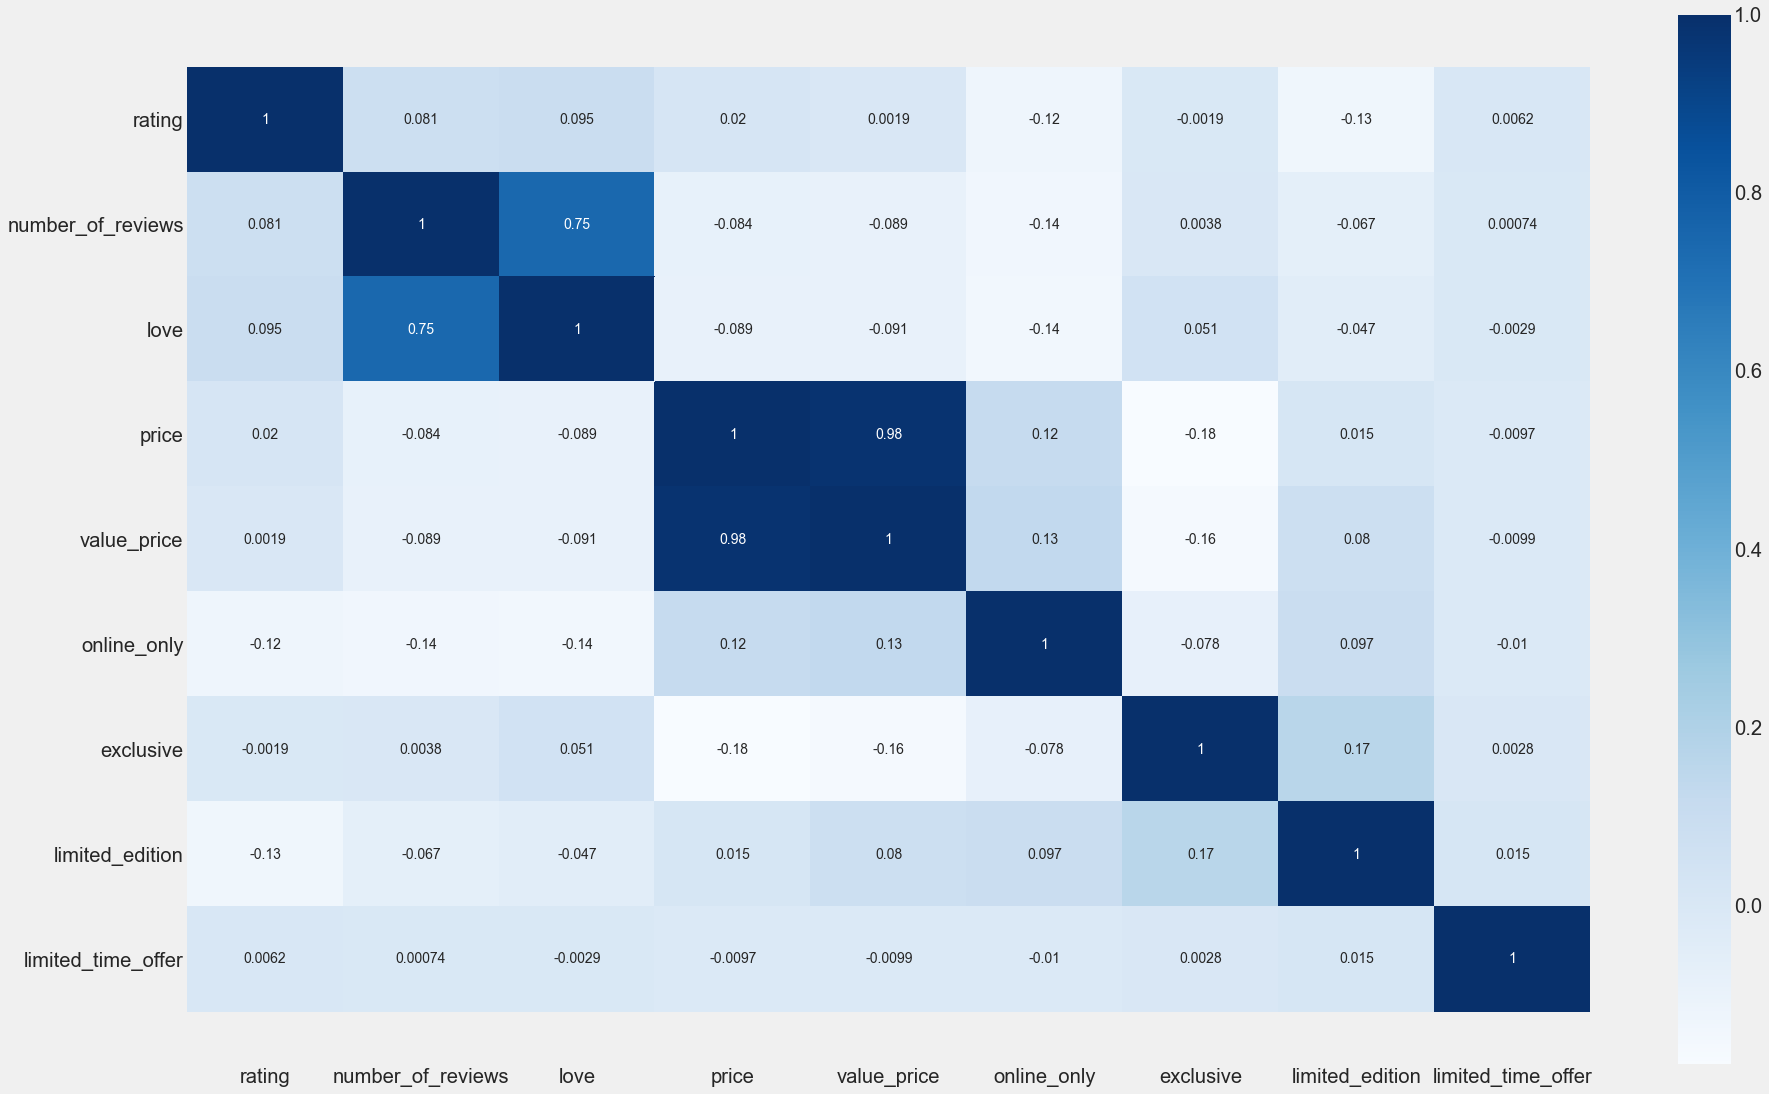

In [19]:
features = ['rating', 'number_of_reviews', 'love', 'price', 'value_price', 'online_only', 'exclusive', 'limited_edition', 'limited_time_offer']

plt.figure(figsize=(28,18))
ax = sns.heatmap(data = df[features].corr(),cmap='Blues',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

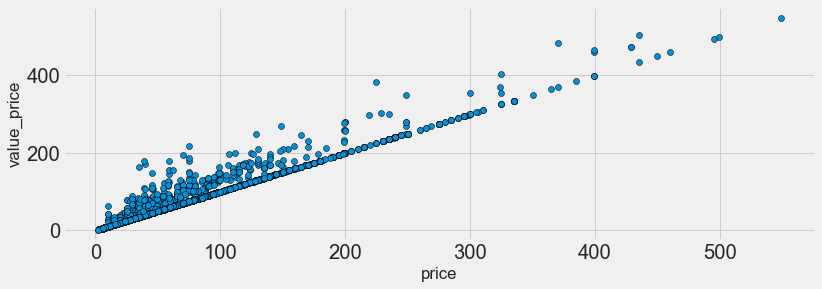

In [20]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['price'], y=df['value_price'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="price", ylabel="value_price")

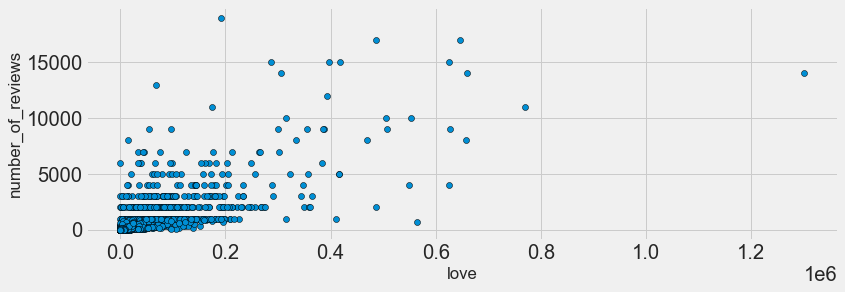

In [21]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['love'], y=df['number_of_reviews'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="love", ylabel="number_of_reviews")

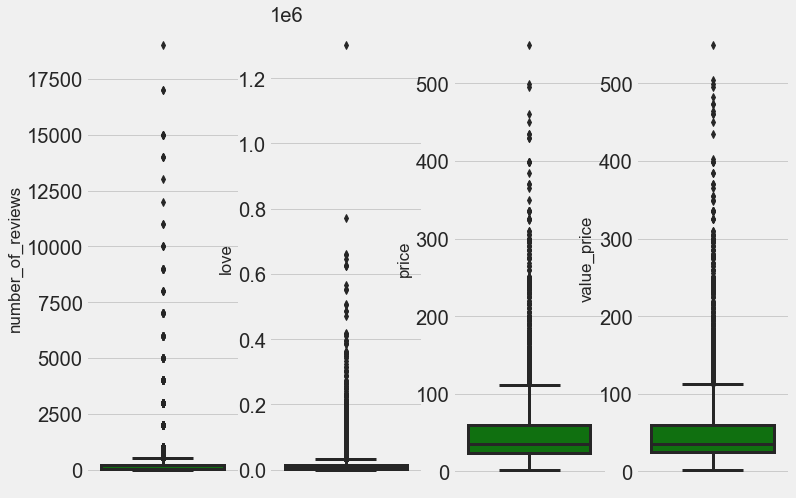

In [22]:
features = ['number_of_reviews', 'love', 'price', 'value_price']
plt.figure(figsize=(20, 8))
for i in range(0, len(features)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')

C:\Users\talba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


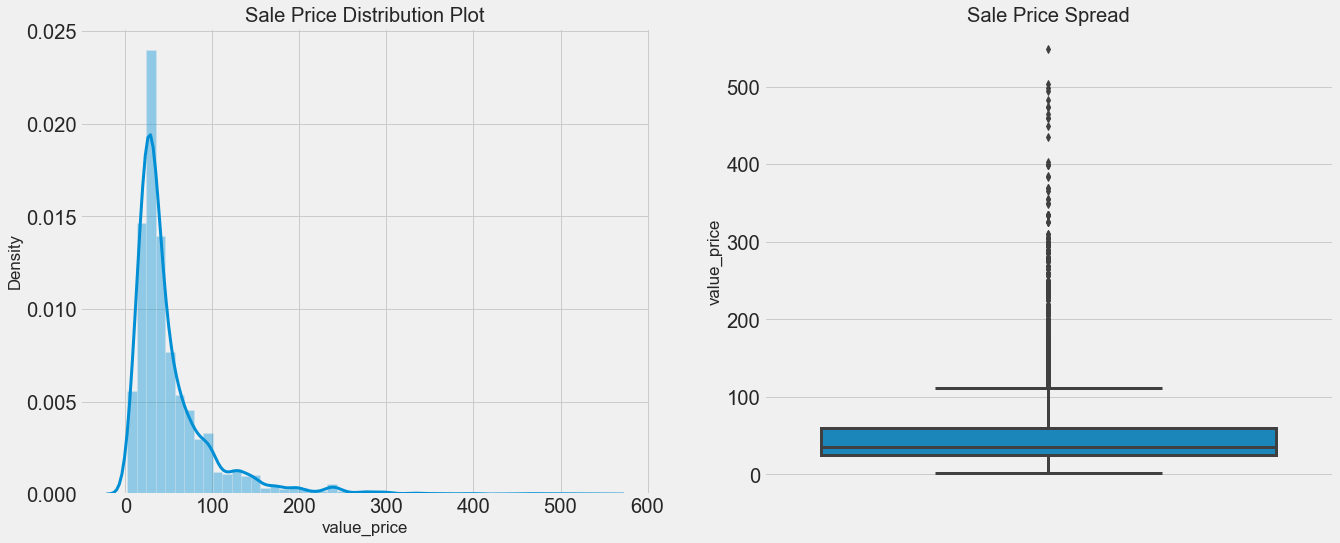

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Sale Price Distribution Plot')
sns.distplot(df.value_price)

plt.subplot(1,2,2)
plt.title('Sale Price Spread')
sns.boxplot(y=df.value_price)

plt.show()

In [24]:
print(df.value_price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    9168.00000
mean       51.82359
std        49.45902
min         2.00000
25%        25.00000
50%        35.00000
75%        60.00000
85%        85.00000
90%       103.00000
100%      549.00000
max       549.00000
Name: value_price, dtype: float64


Skewness Co-efficient: 3.143


C:\Users\talba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


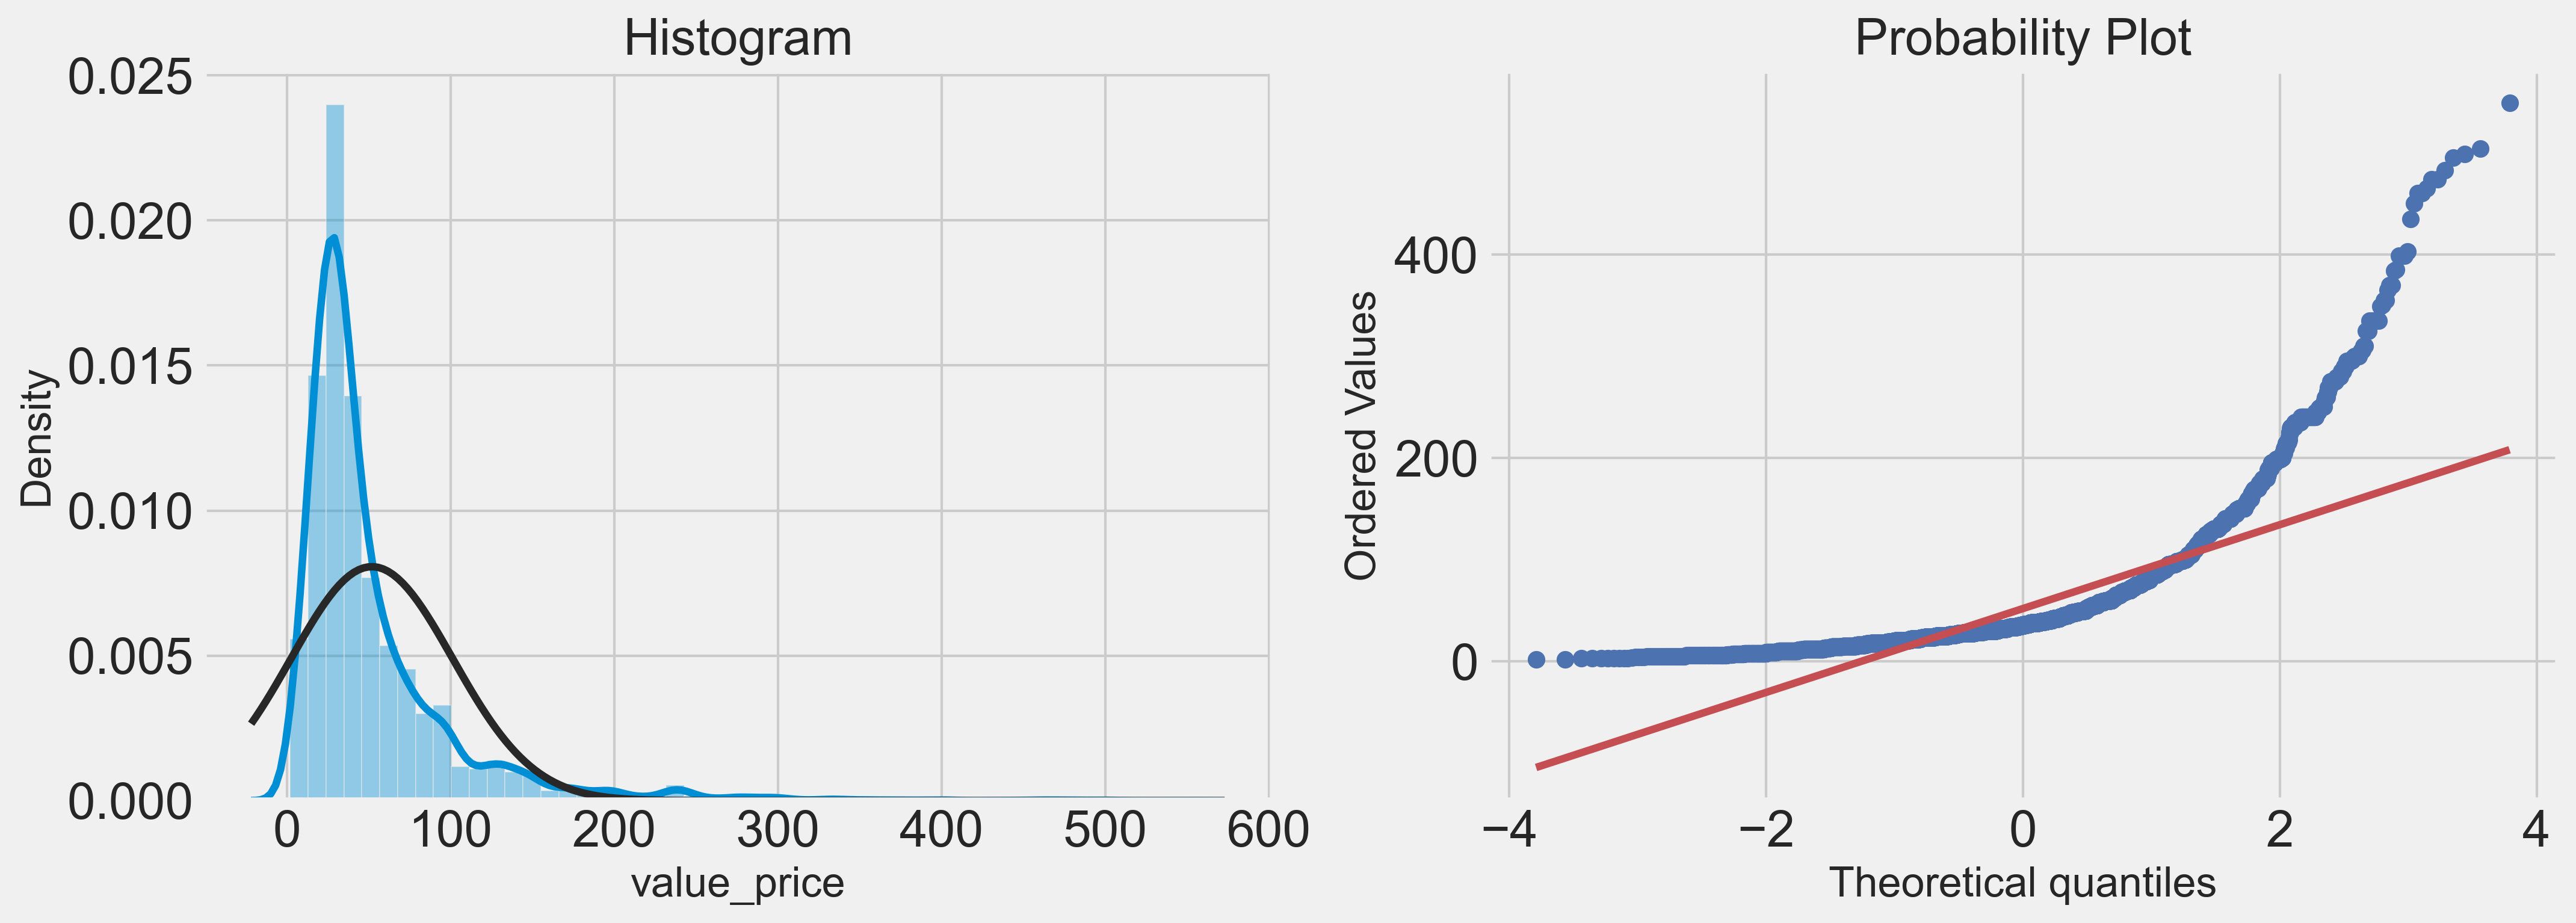

In [25]:
# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df.value_price.skew(), 3)}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['value_price'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')

# PROBABILITY / QQ PLOT
stats.probplot(df['value_price'], plot=ax2)

plt.show()

Skewness Co-efficient: 0.31


C:\Users\talba\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


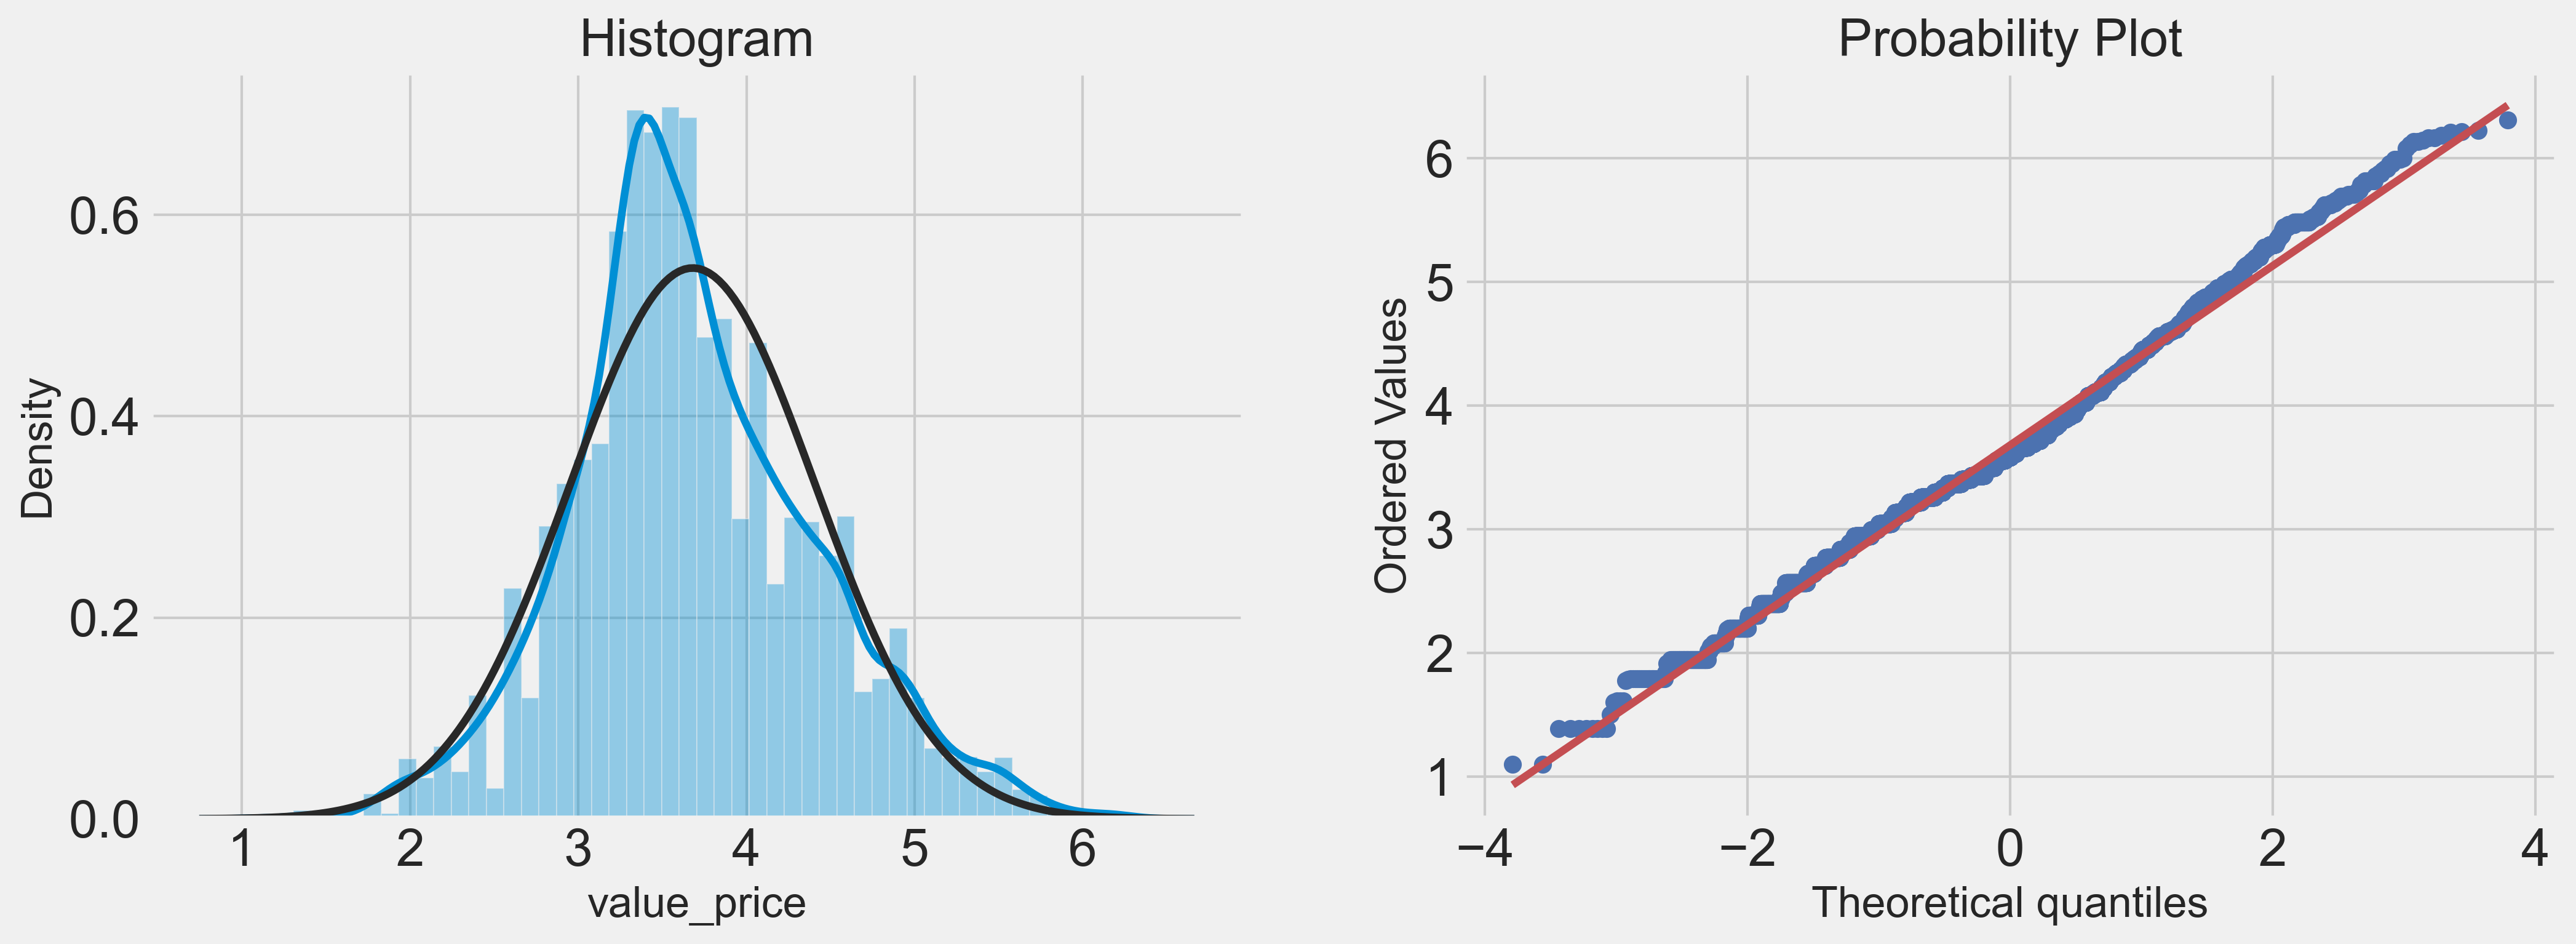

In [24]:
df["value_price"] = np.log1p(df["value_price"])

# GET SKEWNESS 
print(f"Skewness Co-efficient: {round(df.value_price.skew(), 3)}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), dpi=300)

# HISTOGRAM 
from scipy import stats
sns.distplot(df['value_price'] , fit=stats.norm, ax=ax1)
ax1.set_title('Histogram')
# PROBABILITY / QQ PLOT
stats.probplot(df['value_price'], plot=ax2)

plt.show()

In [26]:
for index, row in df.iterrows():
    if row['price']!=row['value_price']:
        print(index, row['price'], row['value_price'])

0 66.0 75.0
4 72.0 80.0
15 80.0 95.0
20 113.0 143.0
28 200.0 279.0
31 113.0 143.0
32 200.0 279.0
65 125.0 200.0
77 80.0 144.0
82 40.0 60.0
88 112.0 137.0
110 95.0 129.0
135 65.0 97.0
166 25.0 36.0
182 29.0 44.0
200 29.0 52.0
207 150.0 165.0
253 62.0 81.0
254 170.0 230.0
259 25.0 28.0
265 140.0 197.0
318 24.0 32.0
344 30.0 37.0
363 49.0 72.0
369 88.0 112.0
384 126.0 198.0
412 118.0 170.0
422 130.0 170.0
425 95.0 137.0
427 95.0 137.0
441 170.0 216.0
444 370.0 483.0
450 110.0 144.0
466 55.0 85.0
472 24.0 37.0
478 135.0 160.0
481 135.0 160.0
483 78.0 126.0
494 140.0 190.0
503 80.0 110.0
504 135.0 160.0
586 199.0 234.0
587 199.0 260.0
590 249.0 269.0
603 30.0 78.0
612 45.0 65.0
626 50.0 60.0
627 20.0 28.0
628 35.0 50.0
654 25.0 44.0
658 25.0 34.0
678 25.0 30.0
682 23.0 31.0
690 38.0 57.0
717 36.0 60.0
726 25.0 38.0
734 44.0 60.0
735 24.0 38.0
742 24.0 36.0
745 32.0 45.0
748 32.0 48.0
752 34.0 65.0
754 30.0 51.0
757 22.0 34.0
761 32.0 48.0
772 32.0 45.0
774 24.0 36.0
775 32.0 47.0
783 34.0 5

In [27]:
bestBrandReviews = df.groupby(["brand"]).head()
bestBrandReviews = bestBrandReviews.sort_values('number_of_reviews', ascending=False)
bestBrandReviews.head(10)

id                    brand    category  \
519   1922541             bareMinerals  Foundation   
4600  1671361         KVD Vegan Beauty    Eyeliner   
2821  2164671  FENTY BEAUTY by Rihanna  Foundation   
710   1343938        Benefit Cosmetics     Mascara   
8463  1393693              Urban Decay    Eyeliner   
8343  1533439                Too Faced     Mascara   
4601  2180578         KVD Vegan Beauty  Foundation   
272   1056084  Anastasia Beverly Hills     Eyebrow   
4602  1890623         KVD Vegan Beauty    Lipstick   
1160   980995                    Buxom   Lip Gloss   

                                                   name               size  \
519   Original Loose Powder Mineral Foundation Broad...            0.28 oz   
4600                                    Tattoo Eyeliner  0.019 oz/ 0.55 mL   
2821          Pro Filt'r Soft Matte Longwear Foundation     1.08 oz/ 32 mL   
710      They’re Real! Lengthening & Volumizing Mascara      0.3 oz/ 8.5 g   
8463                           24/7 Glide-On Eye Pencil     0.04 oz/ 1.2 g   
8343                            Better Than Sex Mascara            no size   
4601                                 Lock-It Foundation        1 oz/ 30 mL   
272                                            Brow Wiz  0.003 oz/ 0.085 g   
4602                        Everlasting Liquid Lipstick    0.22 oz/ 6.6 mL   
1160                 Full-On™ Plumping Lip Polish Gloss   0.15 oz/ 4.44 mL   

      rating  number_of_reviews     love  price  value_price  ...  \
519      4.5              19000   191700   32.0     3.496508  ...   
4600     4.0              17000   485600   21.0     3.091042  ...   
2821     4.0              15000   625500   35.0     3.583519  ...   
710      4.0              15000   287300   25.0     3.258097  ...   
8463     4.5              15000   397600   22.0     3.135494  ...   
8343     3.5              15000   418700   25.0     3.258097  ...   
4601     4.0              14000   306000   37.0     3.637586  ...   
272      4.5              14000   660000   23.0     3.178054  ...   
4602     4.5              14000  1300000   21.0     3.091042  ...   
1160     4.5              12000   393200   21.0     3.091042  ...   

     MarketingFlags  MarketingFlags_content     options  \
519           False                       0  no options   
4600           True               exclusive  no options   
2821           True               exclusive  no options   
710           False                       0  no options   
8463          False                       0  no options   
8343          False                       0  no options   
4601           True               exclusive  no options   
272           False                       0  no options   
4602           True               exclusive  no options   
1160          False                       0  no options   

                                                details  \
519   What it is: A buildable foundation- made with ...   
4600  What it is: An award-winning- vegan- liquid ey...   
2821  What it is: A soft matte- long-wear foundation...   
710   What it is:A lengthening mascara that curls- v...   
8463  What it is: An award-winning waterproof eye pe...   
8343  What it is: An intensely black voluptuous volu...   
4601  What it is: A full-coverage liquid foundation ...   
272   What it is:\nAn ultra-slim- retractable pencil...   
4602  What it is: A long-wear- high-pigment liquid l...   
1160  What it is: A bestselling lip gloss that boldl...   

                                             how_to_use  \
519   Suggested Usage:\n-Use the Beautiful Finish Br...   
4600  Suggested Usage:-Shake before use to keep the ...   
2821  Suggested Usage:-Be sure to moisturize skin be...   
710   Suggested Usage:\n-Position wand horizontally ...   
8463  Suggested Usage:-Draw precise lines or smudge ...   
8343                                    no instructions   
4601  Suggested Usage:-Make sure skin is well-hydrat...   
272   Suggested Usage:\nU

In [27]:
rating_products = pd.DataFrame(round(df.groupby('brand')['rating'].mean(),2))
most_rating = rating_products.sort_values('rating', ascending=False)
most_rating.head(10)

rating
brand                     
Four Sigmatic         5.00
Fable & Mane          5.00
Aether Beauty         5.00
Montblanc             5.00
Golde                 4.88
RODIN olio lusso      4.81
The Art of Shaving    4.70
Paco Rabanne          4.69
SOBEL SKIN Rx         4.69
dae                   4.67

In [28]:
popular_products = pd.DataFrame(df.groupby('brand')['rating'].sum())
most_popular = popular_products.sort_values('rating', ascending=False)
most_popular.head(10)

rating
brand                     
SEPHORA COLLECTION  1910.5
CLINIQUE             919.0
tarte                681.0
TOM FORD             636.5
Dior                 579.0
Fresh                576.0
Kiehl's Since 1851   510.0
Lancôme              491.0
MAKE UP FOR EVER     420.0
Bumble and bumble    394.5

In [29]:
price_products = pd.DataFrame(df.groupby('brand')['price'].mean())
most_price = price_products.sort_values('price', ascending=False)
most_price.head(10)

price
brand                              
dyson                    340.250000
ReFa                     237.500000
LightStim                209.000000
Beachwaver               199.000000
Jillian Dempsey          195.000000
ghd                      186.000000
NuFACE                   182.800000
SK-II                    180.200000
Dr. Barbara Sturm        166.071429
Skin Inc Supplement Bar  165.000000

In [30]:
love_products = pd.DataFrame(df.groupby('brand')['love'].mean())
most_love = love_products.sort_values('love', ascending=False)
most_love.head(10)

love
brand                                 
stila                    140942.857143
Buxom                    123616.666667
Anastasia Beverly Hills   85580.000000
NARS                      84117.543860
Olaplex                   73700.000000
FENTY BEAUTY by Rihanna   66043.647059
HUDA BEAUTY               63887.037037
Urban Decay               63784.828947
Drunk Elephant            61496.875000
KVD Vegan Beauty          58134.169014

In [31]:
reviews_products = pd.DataFrame(df.groupby('brand')['number_of_reviews'].mean())
most_reviews = reviews_products.sort_values('number_of_reviews', ascending=False)
most_reviews.head(10)

number_of_reviews
brand                                     
Buxom                          4080.000000
stila                          2044.857143
Rosebud Perfume Co.            1500.000000
Blinc                          1352.000000
KVD Vegan Beauty               1212.718310
NARS                           1209.631579
bareMinerals                   1159.000000
Urban Decay                    1148.328947
Anastasia Beverly Hills        1107.100000
Too Faced                      1091.419753

In [32]:
xbrand = df[df['brand']=='Buxom']
xbrand.head(45)

id  brand              category  \
1159  1668995  Buxom             Lip Gloss   
1160   980995  Buxom             Lip Gloss   
1161  1143486  Buxom               Mascara   
1162  2317253  Buxom  Lip Balm & Treatment   
1163  1540293  Buxom               Mascara   
1164  2177160  Buxom                 Blush   

                                    name              size  rating  \
1159   Full-On™ Plumping Lip Cream Gloss  0.14 oz/ 4.45 mL     4.5   
1160  Full-On™ Plumping Lip Polish Gloss  0.15 oz/ 4.44 mL     4.5   
1161             Lash Volumizing Mascara           no size     4.5   
1162           Power-full Plump Lip Balm    0.17 oz/ 4.8 g     3.5   
1163  Lash Waterproof Volumizing Mascara           no size     4.0   
1164     Wanderlust Primer-Infused Blush    0.12 oz/ 3.5 g     4.5   

      number_of_reviews    love  price  value_price  ... MarketingFlags  \
1159               2000  194900   21.0         21.0  ...          False   
1160              12000  393200   21.0         21.0  ...          False   
1161               9000   55500   22.0         22.0  ...          False   
1162                685   48200   18.0         18.0  ...          False   
1163                601   17100   22.0         22.0  ...           True   
1164                194   32800   22.0         22.0  ...          False   

      MarketingFlags_content     options  \
1159                       0  no options   
1160                       0  no options   
1161                       0  no options   
1162                       0  no options   
1163               exclusive  no options   
1164                       0  no options   

                                                details  \
1159  What it is: A creamy- shimmer-free gloss that ...   
1160  What it is: A bestselling lip gloss that boldl...   
1161  What it is: A volumizing mascara that dramatic...   
1162  What it is: A plumping and moisturizing tinted...   
1163  What it is:\nA volumizing- waterproof mascara ...   
1164  What it is: A silky- primer-infused powder blu...   

                                             how_to_use  \
1159  Suggested Usage:-Wear alone or over any Buxom ...   
1160  Suggested Usage:-Wear each shade alone or over...   
1161  Suggested Usage:-After applying mascara- use t...   
1162  Suggested Usage:-Apply shade Big O to lips lib...   
1163                                    no instructions   
1164  Suggested Usage:-Start by applying to the appl...   

                                            ingredients online_only  \
1159  Hydrogenated Polyisobutene- Tridecyl Trimellit...           0   
1160  All original shades except Dominique and Kryst...           0   
1161  Water- Beeswax- Butylene Glycol- PVP- Copernic...           0   
1162  Pentaerythrityl Tetraisostearate- Isostearyl I...           0   
1163  Water- Trimethylsiloxysilicate- Polyvinyl Acet...           0   
1164  Talc- Caprylic/Capric Triglyceride- Boron Nitr...           0   

      exclusive  limited_edition  limited_time_offer  
1159          0                0                   0  
1160          0                0                   0  
1161          0                0                   0  
1162          0                0                   0  
1163          1                0                   0  
1164          0                0                   0  

[6 rows x 21 columns]

In [34]:
ybrand = df[df['brand']=='stila']
ybrand.head(10)

id  brand     category  \
7713  1221084  stila     Eyeliner   
7714  2053833  stila     Eyeliner   
7715  2027209  stila    Eyeshadow   
7716  1891373  stila    Eyeshadow   
7717  1247683  stila     Eyeliner   
7718   353508  stila        Blush   
7719   897116  stila  Eye Brushes   

                                                   name              size  \
7713          Stay All Day® Waterproof Liquid Eye Liner  0.016 oz/ 0.5 mL   
7714  Stay All Day® Waterproof Liquid Eye Liner - Mi...  .016 oz / 0.5 mL   
7715                   Shimmer & Glow Liquid Eye Shadow          0.153 oz   
7716                   Glitter & Glow Liquid Eye Shadow   0.15 oz/ 4.5 mL   
7717                  Smudge Stick Waterproof Eye Liner   0.01 oz/ 0.28 g   
7718                                  Convertible Color   0.15 oz/ 4.25 g   
7719                               #28 Smudge Pot Brush           no size   

      rating  number_of_reviews    love  price  value_price  ...  \
7713     4.5              10000  314500   22.0     3.135494  ...   
7714     4.0                269   17200   22.0     3.135494  ...   
7715     4.5               1000  139300   24.0     3.218876  ...   
7716     4.5               1000  409700   24.0     3.218876  ...   
7717     4.0               1000   68500   22.0     3.135494  ...   
7718     4.5               1000   34700   25.0     3.258097  ...   
7719     4.5                 45    2700   32.0     3.496508  ...   

     MarketingFlags  MarketingFlags_content     options  \
7713          False                       0  no options   
7714          False                       0  no options   
7715          False                       0  no options   
7716          False                       0  no options   
7717          False                       0  no options   
7718          False                       0  no options   
7719          False                       0  no options   

                                                details  \
7713  What it is:An easy-application- waterproof liq...   
7714  What it is: An eyeliner with an ultra-precise-...   
7715  What it is: A long-wearing- high-shimmer liqui...   
7716  What it is: A brilliant long-wearing liquid gl...   
7717  What it is:A color-rich- vibrant- easy-to-use ...   
7718  What it is:A lipstick that doubles as a blush....   
7719  This double-ended brush #28 is designed specif...   

                                             how_to_use  \
7713  Suggested Usage:-Shake well before use.-Before...   
7714  Suggested Usage:-Shake well before use. -Sweep...   
7715  Suggested Usage:-Apply to lid and blend using ...   
7716  Suggested Usage:-Apply directly onto the desir...   
7717  Suggested Usage:-Apply this innovative- flexib...   
7718                                    no instructions   
7719                                    no instructions   

                                            ingredients online_only  \
7713  Water/Aqua/Eau- Ammonium Styrene/Acrylates Cop...           0   
7714  Water- Ammonium Styrene/Acrylates Copolymer- B...           0   
7715  Water- Mica (Ci 77019)- Hydroxyethyl Acrylate/...           0   
7716   -Triethanolamine: Creates a barrier between y...           0   
7717  Isododecane- Cyclopentasiloxane- Peg/Ppg-19/19...           0   
7718  Ricinus Communis (Castor) Seed Oil- Lanolin Oi...           0   
7719                                            unknown           0   

      exclusive  limited_edition  limited_time_offer  
7713          0                0                   0  
7714          0                0                   0  
7715          0                0                   0  
7716          0                0                   0  
7717          0                0                   0  
7718          0                0                   0  
7719          0                0                   0  

[7 rows x 21 columns]

In [33]:
zbrand = df[df['brand']=='NARS']
zbrand.head(45)

id brand                category  \
5835  2337566  NARS                 Bronzer   
5836  2337483  NARS                 Bronzer   
5837  2172310  NARS               Concealer   
5838  2337541  NARS                 Bronzer   
5839  2268654  NARS  Setting Spray & Powder   
5840  2337574  NARS               Lip Gloss   
5841  2337590  NARS    Lip Balm & Treatment   
5842   899393  NARS                   Blush   
5843  2031011  NARS              Foundation   
5844  1900232  NARS               Concealer   
5845  2245355  NARS                  Makeup   
5846  1396399  NARS      Tinted Moisturizer   
5847  1202241  NARS              Foundation   
5848  2296911  NARS    Lip Balm & Treatment   
5849  2245751  NARS                Lipstick   
5850  1900083  NARS                Lipstick   
5851  2337582  NARS               Lip Gloss   
5852  2326262  NARS               Mini Size   
5853  1596451  NARS               Lip Gloss   
5854  1943331  NARS                   Blush   
5855  1677962  NARS              Foundation   
5856  1017920  NARS                   Blush   
5857  1807791  NARS                  Makeup   
5858  2296903  NARS            Eye Palettes   
5859  1965524  NARS                Lipstick   
5860   832642  NARS                 Bronzer   
5861  1236843  NARS              Eye Primer   
5862  2296945  NARS          Cheek Palettes   
5863  2337806  NARS               Mini Size   
5864  2090090  NARS                 Mascara   
5865   804070  NARS    Mirrors & Sharpeners   
5866  2165207  NARS               Lip Gloss   
5867  1478585  NARS                Lipstick   
5868  2295954  NARS                Eyeliner   
5869  1479922  NARS                  Makeup   
5870  1637131  NARS                Lipstick   
5871  1975275  NARS               Lip Liner   
5872  1478239  NARS  Setting Spray & Powder   
5873  2058642  NARS             Highlighter   
5874  2191955  NARS          Cheek Palettes   
5875  1900133  NARS             Face Primer   
5876  2191898  NARS            Eye Palettes   
5877  1935501  NARS                   Blush   
5878  2148849  NARS            Eye Palettes   
5879  2058493  NARS                Lipstick   

                                                   name  \
5835  Laguna Bronzer Powder with Gold Overspray – Jumbo   
5836                                     Bronzer Powder   
5837                           Radiant Creamy Concealer   
5838                               Matte Bronzer Powder   
5839            Light Reflecting Pressed Setting Powder   
5840           Oil-Infused Lip Tint - Laguna Collection   
5841             Afterglow Lip Balm - Laguna Collection   
5842                                              Blush   
5843                Natural Radiant Longwear Foundation   
5844                      Soft Matte Complete Concealer   
5845                      Radiant Creamy Concealer Mini   
5846  Pure Radiant Tinted Moisturizer Broad Spectrum...   
5847                              Sheer Glow Foundation   
5848                                 Afterglow Lip Balm   
5849                                           Lipstick   
5850                       Velvet Matte Lipstick Pencil   
5851                               Oil-Infused Lip Tint   
5852  Mini Laguna Bronzer + Mini Lip Oil Duo Set – L...   
5853                                          Lip Gloss   
5854                                       Liquid Blush   
5855             All Day Luminous Weightless Foundation   
5856                                       The Multiple   
5857                   Velvet Matte Lipstick Pencil Duo   
5858                        Afterglow Eyeshadow Palette   
5859                             Powermatte Lip Pigment   
5860                                  Blush/Bronzer Duo   
5861             Pro-Prime™ Smudge Proof Eyeshadow Base   
5862                   Afterglow Overlust Cheek Palette   
5863                 Mini Laguna Getaway Bronzer Powder   
5864                                     Climax Mascara   
5865               

In [34]:
price_category = pd.DataFrame(df.groupby('category')['rating'].mean())
most_price = price_category.sort_values('rating', ascending=False)
most_price.head()

rating
category                  
Lid Shadow Brush  5.000000
Cologne           4.553797
Aftershave        4.538462
High Tech Tools   4.500000
Powder Brush      4.500000

In [35]:
price_sorted_category = pd.pivot_table(df,
              index=['category'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['category', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

category     price
119                  Perfume  74584.00
58               Face Serums  31670.59
116             Moisturizers  30594.94
140        Value & Gift Sets  23389.99
28                   Cologne  15661.00
45   Eye Creams & Treatments  13340.97
47              Eye Palettes  10628.50
120        Perfume Gift Sets  10319.00
55                Face Masks  10174.92
62     Face Wash & Cleansers   8505.87

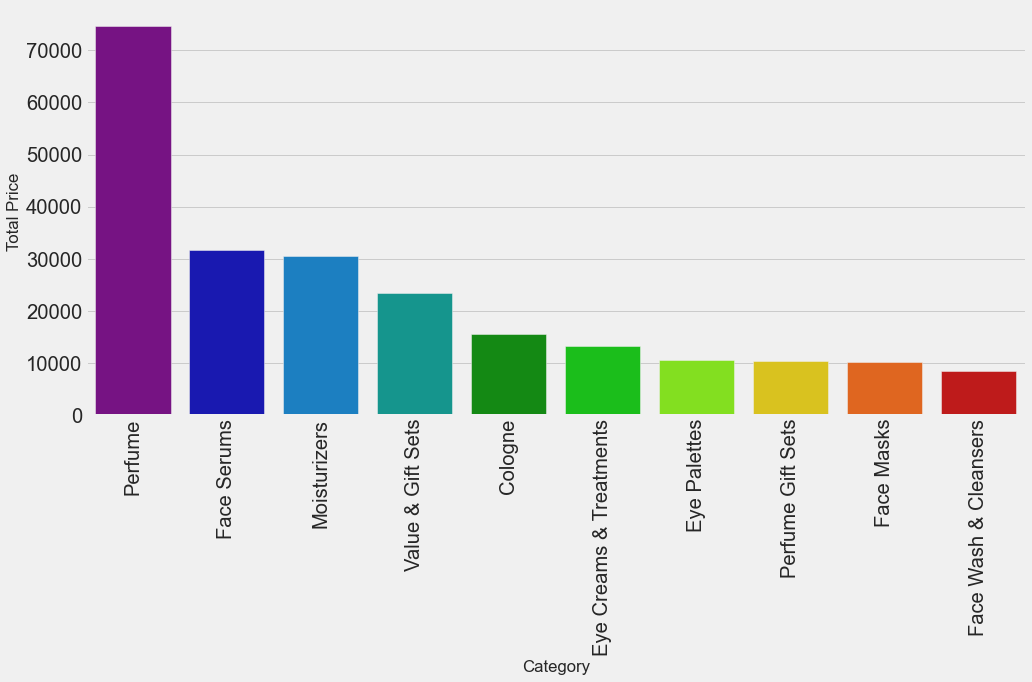

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category", y="price", data=price_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Price")

In [37]:
price_sorted_category = pd.pivot_table(df,
              index=['brand'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['brand', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

brand     price
262            TOM FORD  18040.00
69                 Dior   9797.50
232  SEPHORA COLLECTION   9097.95
155              La Mer   7380.00
125    Jo Malone London   7122.00
38             CLINIQUE   7042.50
72    Dr. Barbara Sturm   6975.00
99                Fresh   6712.00
247            Shiseido   6118.00
102            Givenchy   6068.00

In [38]:
brandHighestPrice = df[(df["brand"] == 'TOM FORD')]
brandHighestPrice.head()

id     brand        category  \
8181  2101426  TOM FORD  Lotions & Oils   
8182  2327278  TOM FORD  Lotions & Oils   
8183  2335735  TOM FORD    Eye Palettes   
8184  1565902  TOM FORD         Perfume   
8185  1449289  TOM FORD         Perfume   

                                       name            size  rating  \
8181       Soleil Blanc Shimmering Body Oil  3.4 oz/ 101 mL     4.0   
8182  Soleil Blanc Mini Shimmering Body Oil         no size     4.0   
8183       Eye Color Quad Eyeshadow Palette         no size     4.5   
8184                              Oud Wood    1.7 oz/ 50 mL     4.5   
8185                        Tobacco Vanille   1.7 oz/ 50 mL     4.5   

      number_of_reviews    love  price  value_price  ... MarketingFlags  \
8181                132   28200  100.0        100.0  ...          False   
8182                132    4300   34.0         34.0  ...           True   
8183                340  129400   88.0         88.0  ...           True   
8184                 87   12400  240.0        240.0  ...          False   
8185                132   18000  240.0        240.0  ...          False   

       MarketingFlags_content  \
8181                        0   
8182  exclusive · online only   
8183              online only   
8184                        0   
8185                        0   

                                                options  \
8181   - 3.4 oz/ 101 mL  Oil - 3.4 oz/ 101 mL Rose G...   
8182                                         no options   
8183                                         no options   
8184                                         no options   
8185                                         no options   

                                                details  \
8181  Fragrance Family: Warm & Spicy\n\nScent Type: ...   
8182  Fragrance Family: Warm & Spicy\nScent Type: Wa...   
8183  What it is: A palette with four coordinated ey...   
8184  Fragrance Family: Earthy & WoodyScent Type: Cl...   
8185  Fragrance Family: Warm & SpicyScent Type: Warm...   

                                             how_to_use  \
8181  Suggested Usage:-Fragrance is intensified by t...   
8182  Suggested Usage:-Fragrance is intensified by t...   
8183  Suggested Usage:-Apply with appropriate brushe...   
8184  Suggested Usage:-On clean skin- spray once or ...   
8185  Suggested Usage:-On clean skin- spray fragranc...   

                                            ingredients online_only  \
8181                                            unknown           0   
8182  Ethylhexyl Palmitate- Caprylic/Capric Triglyce...           1   
8183                                            unknown           1   
8184  Alcohol Denat.- Fragrance- Water- Linalool- Bh...           0   
8185  Alcohol Denat.- Fragrance- Water- Linalool- Be...           0   

      exclusive  limited_edition  limited_time_offer  
8181          0                0                   0  
8182          1                0                   0  
8183          0                0                   0  
8184          0                0                   0  
8185          0                0                   0  

[5 rows x 21 columns]

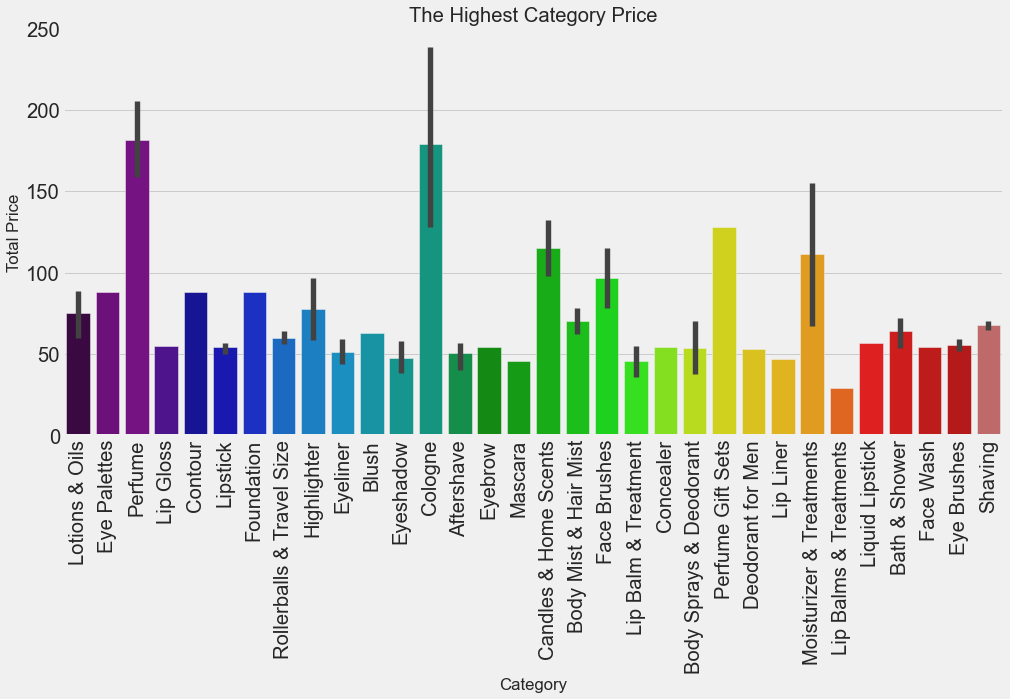

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot( x="category", y="price", data=brandHighestPrice, # plot the highest brand price 
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(title = 'The Highest Category Price' ,xlabel="Category", ylabel="Total Price")

In [40]:
price_sorted_category = pd.pivot_table(df,
              index=['name'],
              values=['price'],
              aggfunc=['sum']
              ).reset_index()
price_sorted_category.columns = ['name', 'price']
price_sorted_category = price_sorted_category.sort_values(['price'], ascending = False)
price_sorted_category = price_sorted_category.head(10)
price_sorted_category

name  price
348                                     Airwrap™ Styler  549.0
2061                         Corrale™ Hair Straightener  499.0
5542            Neuropeptide Smoothing Facial Conformer  495.0
5853                       Orchidée Impériale The Cream  460.0
2663                Elixir Vitae Serum Wrinkle Solution  450.0
7553     SpectraLite™ Faceware Pro Wrinkle Reducing Duo  435.0
7552                          SpectraLite™ Faceware Pro  435.0
8370  Trinity + Eye and Lip Enhancer Attachment Bundle   429.0
8372  Trinity Facial Toning Device + Wrinkle Reducer...  429.0
5699                          NuBODY Skin Toning Device  399.0

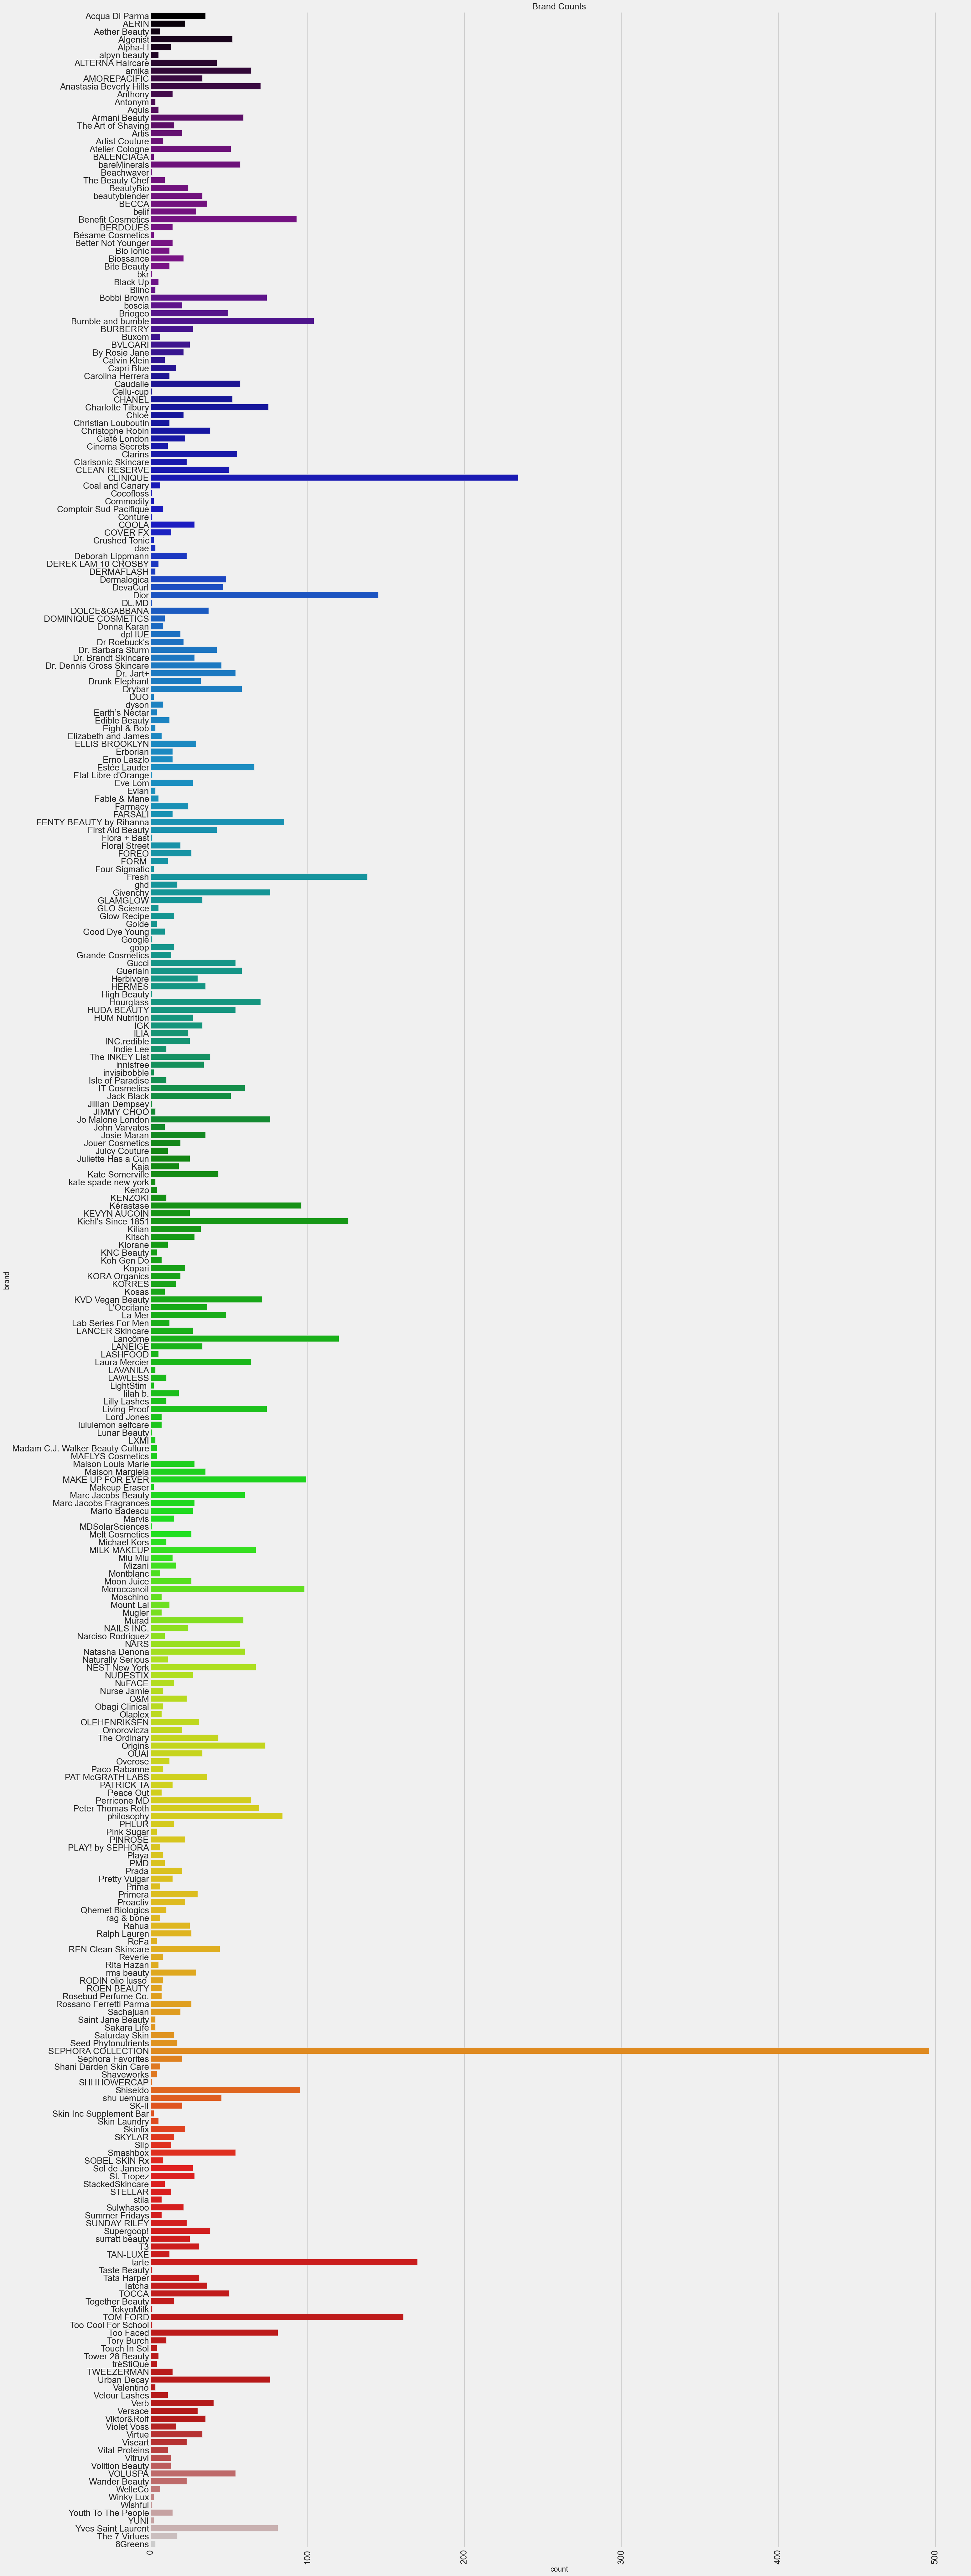

In [41]:
plt.figure(figsize=(30,100),dpi=100)
plt.xticks(rotation=90)
plt.title('Brand Counts')
sns.countplot(y=df['brand'], palette="nipy_spectral");

<AxesSubplot:xlabel='exclusive', ylabel='brand'>

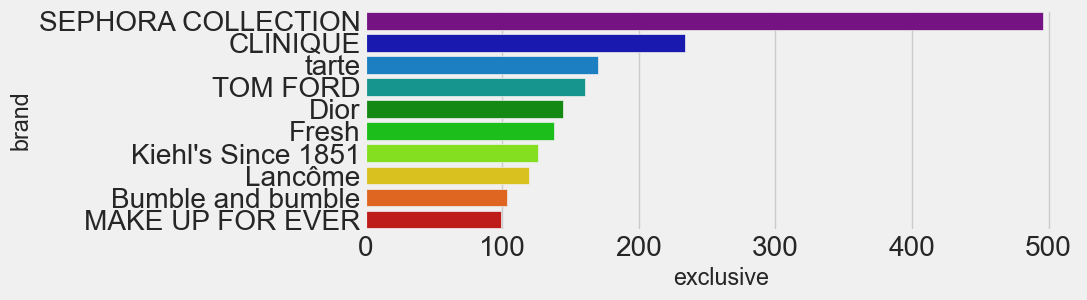

In [42]:
brandbig10 = df.groupby(['brand'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=brandbig10['brand'],x=brandbig10['exclusive'], palette='nipy_spectral')

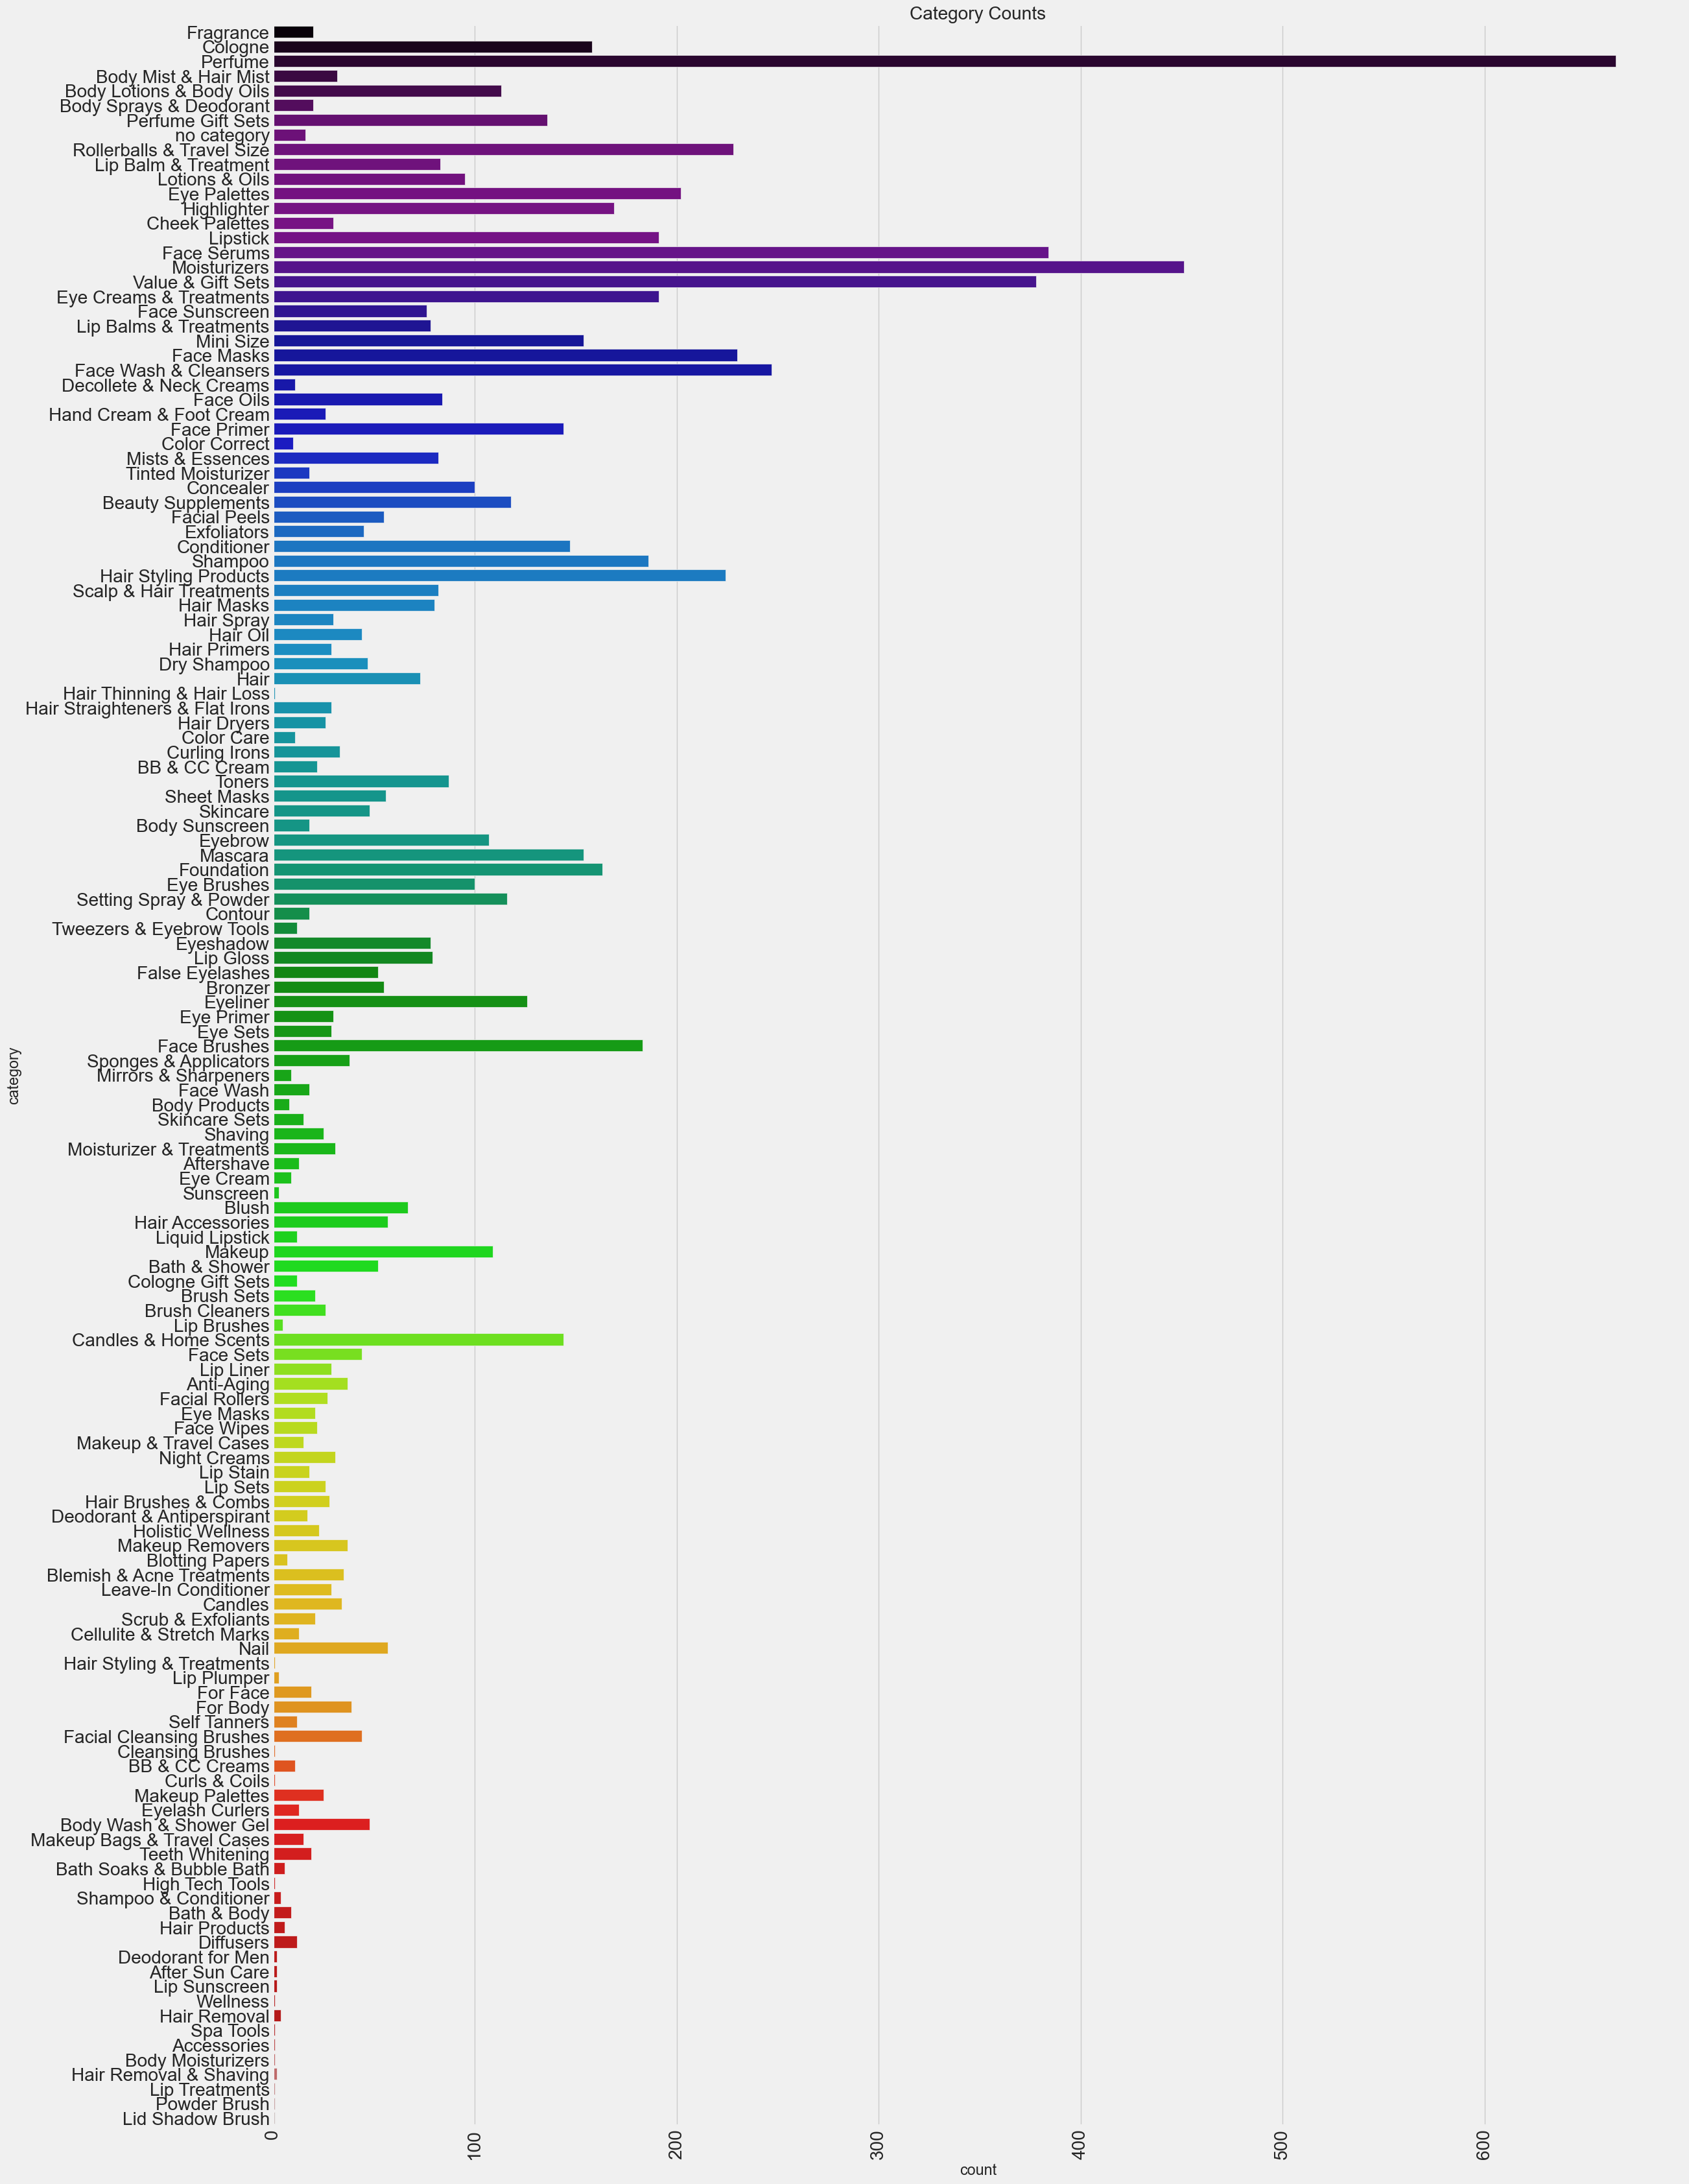

In [45]:
plt.figure(figsize=(25,40),dpi=100)
plt.xticks(rotation=90)
plt.title('Category Counts')
sns.countplot(y=df['category'], palette="nipy_spectral");

<AxesSubplot:xlabel='exclusive', ylabel='category'>

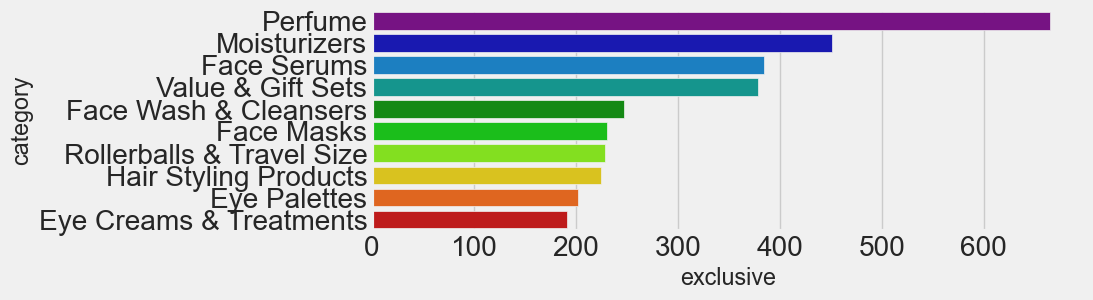

In [43]:
categorybig10 = df.groupby(['category'])['exclusive'].count().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(18,6), dpi=100)
plt.subplot(2,2,1)
plt.ylabel('')
plt.xlabel('')
sns.barplot(y=categorybig10['category'],x=categorybig10['exclusive'], palette='nipy_spectral')

C:\Users\talba\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

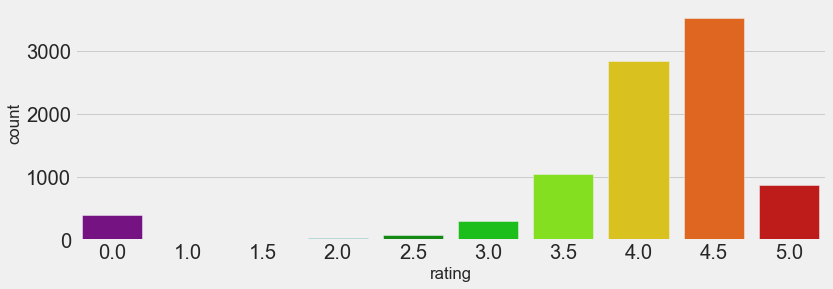

In [44]:
sns.countplot(df['rating'],palette='nipy_spectral',orient='v')

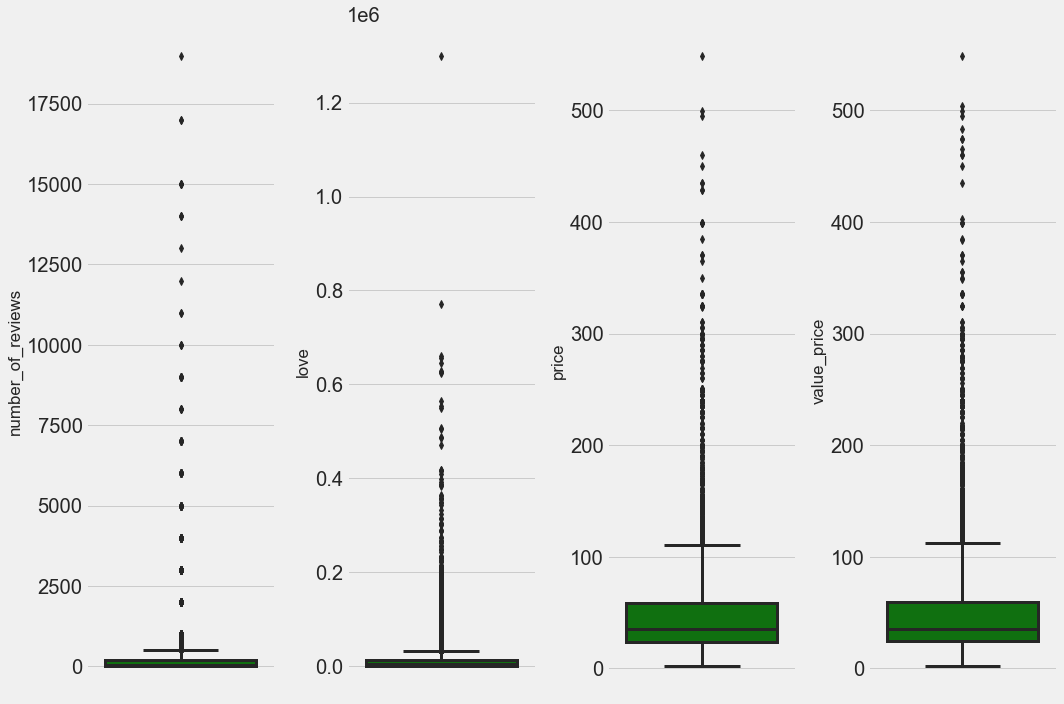

In [45]:
features = ['number_of_reviews','love','price','value_price']
plt.figure(figsize=(15, 10))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout()

In [46]:
df['number_of_reviews'] = np.log1p(df['number_of_reviews'])
df['love'] = np.log1p(df['love'])
df['price'] = np.log1p(df['price'])
df['value_price'] = np.log1p(df['value_price'])

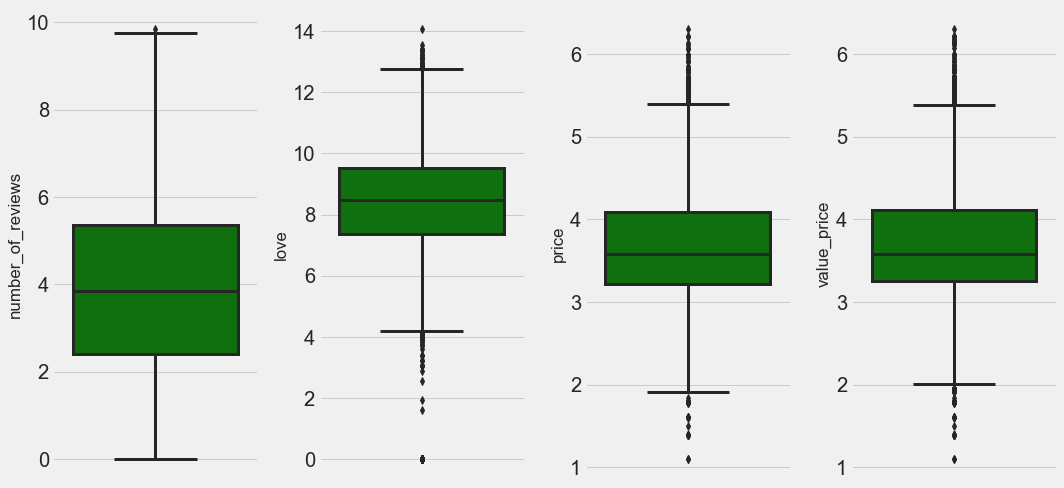

In [47]:
plt.figure(figsize=(15, 7))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[features[i]],color='green',orient='v')
    plt.tight_layout()

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   float64
 7   love                    9168 non-null   float64
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [49]:
df['MarketingFlags'] = df.MarketingFlags.map({False:0, True:1})

In [50]:
df = df.drop(['id'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['URL'],axis=1)
df = df.drop(['options'],axis=1)
df = df.drop(['details'],axis=1)
df = df.drop(['how_to_use'],axis=1)
df = df.drop(['ingredients'],axis=1)
df = df.drop(['price'],axis=1)

In [52]:
 df['rating']=df['rating'].astype(str)

In [53]:
# Get all the categorical columns
cat_cols = df.select_dtypes("object").columns

## One-Hot Encoding all the categorical variables but dropping one of the features among them.
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(df[i].unique()[-1]) ]

## Create dummy variables (One-Hot Encoding)
df = pd.get_dummies(df, columns=cat_cols) 

## Drop the last column generated from each categorical feature
df.drop(drop_categ, axis=1, inplace=True)

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [52]:
#X = df.drop('value_price', axis = 1) 
y = df['value_price']


In [55]:
#Split Data
X=df.drop("value_price" ,axis =1)#Feature
y=df["value_price"]#Target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [238]:
#scaler = RobustScaler() #RobustScaler - StandardScaler
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [57]:
# lets print the shapes again 
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (7334, 2112)
Shape of the y Train : (7334,)
Shape of the X test : (1834, 2112)
Shape of the y test : (1834,)


In [58]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [73]:
df.value_price

AttributeError: 'Series' object has no attribute 'value_price'

In [59]:
### BASELINE

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
lr.score(X_train, y_train)


0.8197461967456261

In [61]:
lr.score(X_test, y_test)

-7.319557133871611e+19

In [62]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
df_imp = pd.DataFrame(xgb.feature_importances_ , columns = ['Importance'], index=X_train.columns)
df_imp = df_imp.sort_values(['Importance'], ascending = False)

df_imp.head()

Importance
category_Perfume            0.071858
brand_SEPHORA COLLECTION    0.029433
category_Cologne            0.025705
brand_The Ordinary          0.022397
category_Hair               0.017290

In [64]:
xgb.score(X_train, y_train)

0.8267556285216862

In [65]:
xgb.score(X_test, y_test)

0.7084115042592798

In [95]:
XGB_model = XGBRegressor()

XGB_model.fit(X_train, y_train)
y_pred= XGB_model.predict(X_test)

print("R2 on Traing set   : ",XGB_model.score(X_train,y_train))
print("R2 on Validation set  : ",XGB_model.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

R2 on Traing set   :  0.8267556285216862
R2 on Validation set  :  0.7084115042592798
__________________________________________
		Error Table
Mean Absolute Error      :  0.2749069799110997
Mean Squared  Error      :  0.15210710690248921
Root Mean Squared Error  :  0.39000911130701704
R Squared Error          :  0.7084115042592798


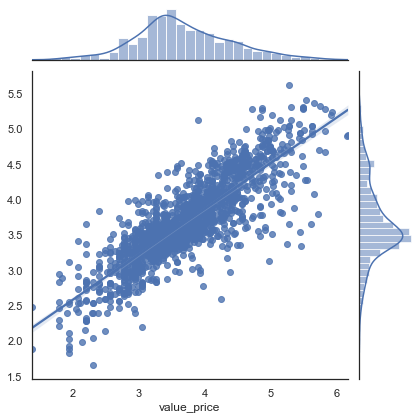

In [94]:
np.random.seed(0)
sns.set(style="white", color_codes=True)
df = df['value_price']
g = sns.jointplot( x = y_test  ,  y = XGB_model.predict(X_test) , data= df, kind='reg')
plt.show()

In [96]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, y_train)
y_pred= RandomForest.predict(X_test)

print("R2 on Traing set   : ",RandomForest.score(X_train,y_train))
print("R2 on Validation set  : ",RandomForest.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

R2 on Traing set   :  0.9590766596821066
R2 on Validation set  :  0.7149261257931852
__________________________________________
		Error Table
Mean Absolute Error      :  0.2606203374171136
Mean Squared Error       :  0.14870875529204663
Root Mean Squared Error  :  0.385627741860005
R Squared Error          :  0.7149261257931852


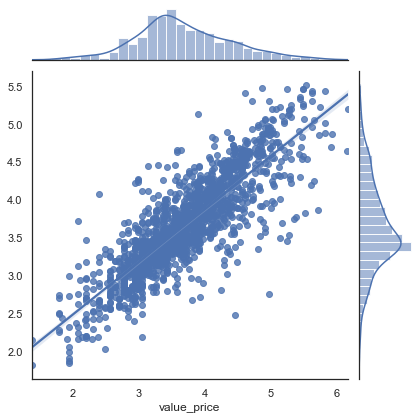

In [88]:
np.random.seed(0)
sns.set(style="white", color_codes=True)
df = df['value_price']
g = sns.jointplot( x = y_test  ,  y = RandomForest.predict(X_test) , data= df, kind='reg')
plt.show()

In [97]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred= ridge.predict(X_test)

print("R2 on Traing set   : ",ridge.score(X_train,y_train))
print("R2 on Validation set  : ",ridge.score(X_test,y_test))
print("__________________________________________")
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

R2 on Traing set   :  0.8028556013663479
R2 on Validation set  :  0.7443683392562982
__________________________________________
		Error Table
Mean Absolute Error      :  0.25706722812762645
Mean Squared  Error      :  0.13335022786008033
Root Mean Squared Error  :  0.3651715047208371
R Squared Error          :  0.7443683392562982


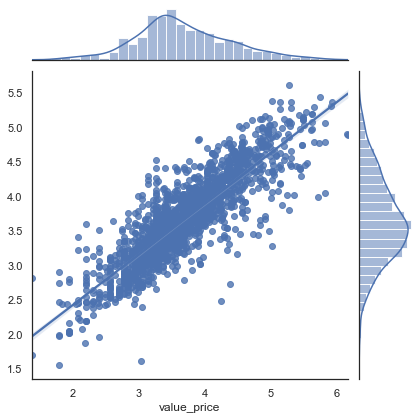

In [81]:
np.random.seed(0)
sns.set(style="white", color_codes=True)
df = df['value_price']
g = sns.jointplot( x = y_test  ,  y = ridge.predict(X_test) , data= df, kind='reg')
plt.show()